In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

In [2]:
plt.rcParams['figure.figsize'] = (14, 8)

In [3]:
#Cargar el modelo
#model = pickle.load( open( "clasificadorRLToxicidad.pkl", "rb" ) )
model = pickle.load( open( "clasificadorArbolToxicidad.pkl", "rb" ) )

In [4]:
#Carga de los datos
comentariosTwitter = pd.read_csv('datos/submission.csv') 
comentariosTwitter.head()

,id,comment_text,creation_time,source,tweet_id,user,user_id,toxic,severe_toxic,obscene,threat,insult,identity_attack
0,0,rt nosurrenderhk guardiannews the truth is hk ...,2020-06-13 16:07:02,Twitter for Android,1271836487663808513,currentecalamo,1005852785609326592,0.028525,0.001610,0.008574,0.000802,0.009100,0.003459
1,1,rt marisakabas content warning police brutalit...,2020-06-13 16:07:02,Twitter for Android,1271836487663775744,Donald Dire,1088300096666591232,0.006022,0.002773,0.013770,0.001169,0.016658,0.003206
2,2,rt shahmiruk it is absolutely unfair amp disin...,2020-06-13 16:07:02,Twitter for iPhone,1271836487693275144,tanya cochrane 🕷#FBPE,25872176,0.581241,0.007748,0.068670,0.001182,0.119748,0.061484
3,3,rt autotheoryqueen terfs police the boundaries...,2020-06-13 16:07:02,Twitter for iPhone,1271836487747862529,Michael Bermingham,59031350,0.024132,0.001585,0.008654,0.000426,0.009315,0.013586
4,4,looks like a scary demon witch monster to me,2020-06-13 16:07:02,Twitter for iPhone,1271836487676579841,untossable chum,2771192143,0.274693,0.002532,0.029018,0.000760,0.050144,0.006064


In [5]:
#Seleccion de variables para clasificar
col = ['toxic','severe_toxic','obscene','identity_attack','insult','threat']
X = comentariosTwitter[col]
X

,toxic,severe_toxic,obscene,identity_attack,insult,threat
0,0.028525,0.001610,0.008574,0.003459,0.009100,0.000802
1,0.006022,0.002773,0.013770,0.003206,0.016658,0.001169
2,0.581241,0.007748,0.068670,0.061484,0.119748,0.001182
3,0.024132,0.001585,0.008654,0.013586,0.009315,0.000426
4,0.274693,0.002532,0.029018,0.006064,0.050144,0.000760
...,...,...,...,...,...,...
46320,0.377025,0.006002,0.040397,0.004014,0.080982,0.001909
46321,0.043127,0.001917,0.003345,0.005009,0.011429,0.004729
46322,0.285102,0.008395,0.025220,0.021252,0.051000,0.050829
46323,0.063165,0.002518,0.008595,0.001974,0.021814,0.000706


In [6]:
#Realizar la predicción
pred_y = model.predict(X)

In [7]:
#Adicionamos la variable predicha al dataset
comentariosTwitter["toxicidad"] = pred_y
comentariosTwitter.head()

,id,comment_text,creation_time,source,tweet_id,user,user_id,toxic,severe_toxic,obscene,threat,insult,identity_attack,toxicidad
0,0,rt nosurrenderhk guardiannews the truth is hk ...,2020-06-13 16:07:02,Twitter for Android,1271836487663808513,currentecalamo,1005852785609326592,0.028525,0.001610,0.008574,0.000802,0.009100,0.003459,0
1,1,rt marisakabas content warning police brutalit...,2020-06-13 16:07:02,Twitter for Android,1271836487663775744,Donald Dire,1088300096666591232,0.006022,0.002773,0.013770,0.001169,0.016658,0.003206,0
2,2,rt shahmiruk it is absolutely unfair amp disin...,2020-06-13 16:07:02,Twitter for iPhone,1271836487693275144,tanya cochrane 🕷#FBPE,25872176,0.581241,0.007748,0.068670,0.001182,0.119748,0.061484,2
3,3,rt autotheoryqueen terfs police the boundaries...,2020-06-13 16:07:02,Twitter for iPhone,1271836487747862529,Michael Bermingham,59031350,0.024132,0.001585,0.008654,0.000426,0.009315,0.013586,0
4,4,looks like a scary demon witch monster to me,2020-06-13 16:07:02,Twitter for iPhone,1271836487676579841,untossable chum,2771192143,0.274693,0.002532,0.029018,0.000760,0.050144,0.006064,2


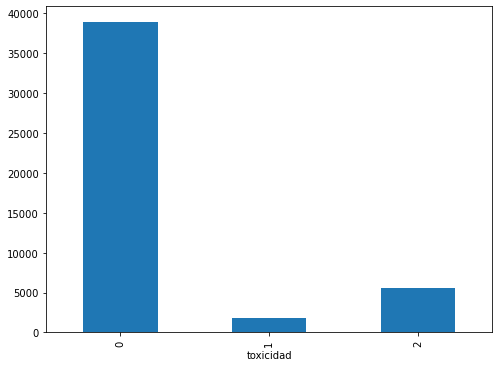

In [8]:
#Revisamos distribución de la toxicidad
fig = plt.figure(figsize=(8,6))
comentariosTwitter.groupby('toxicidad').comment_text.count().plot.bar(ylim=0)
plt.show()

In [11]:
#Ver cantidades por clase
print(comentariosTwitter.groupby('toxicidad').size())

toxicidad
0    38913
1     1813
2     5599
dtype: int64


In [9]:
#Revision de comentarios mas tóxicos
dftoxico = comentariosTwitter.loc[comentariosTwitter.toxicidad == 2]
dftoxico.comment_text

2        rt shahmiruk it is absolutely unfair amp disin...
4             looks like a scary demon witch monster to me
22       blm amp supporters protesting peacefullyon the...
26       rt richiek143 forgot about the idiots causing ...
27       rt sooksthe so the police seem to be  yet agai...
                               ...                        
46293    rt fobbsmagazine tw black death y’all were lou...
46310    shes a complete disgrace to the position and u...
46313    rt escapedmatrix how is this acceptable this i...
46320    rt gatorfun1 watch  what a hypocrite gov whitm...
46322    piersmorgan arm the police  shoot to kill  the...
Name: comment_text, Length: 5599, dtype: object

(-0.5, 399.5, 199.5, -0.5)

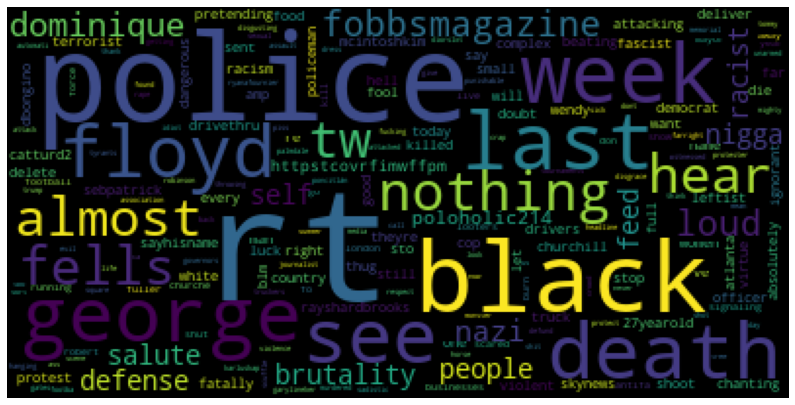

In [10]:
#Revisar las palabras que mas aparecen en los comentarios más tóxicos
def nonan(x):
    if type(x) == str:
        return x.replace("\n", "")
    else:
        return ""

# Generar la word cloud 
text = ' '.join([nonan(comentario) for comentario in dftoxico["comment_text"]])
wordcloud = WordCloud(max_font_size=None, collocations=False).generate(text)

# Visualizar la wordcloud 
plt.imshow(wordcloud)
plt.axis("off")